In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import seaborn as sns
import plotly.express as px
from matplotlib.colors import Normalize
from matplotlib.patches import Patch
from matplotlib.lines   import Line2D
import numpy as np

## Разведывательный анализ данных об оттоке клиентов международного банка.




In [2]:
# Загрузка данных

churn_data = pd.read_csv('data/churn.csv')
churn_data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Описание столбцы таблицы:
 - CustomerId — идентификатор клиента
 - Surname — фамилия клиента
 - CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
 - Geography — страна клиента (банк международный)
 - Gender — пол клиента
 - Age — возраст клиента

 - Tenure — сколько лет клиент пользуется услугами банка
 - Balance — баланс на счетах клиента в банке
 - NumOfProducts — количество услуг банка, которые приобрёл клиент
 - HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
 - IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
 - EstimatedSalary — предполагаемая заработная плата клиента
 - Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

In [3]:
# Удаляем лишний столбец - 'RowNumber' 
churn_data.drop(columns = 'RowNumber', inplace = True)

# Посмотрим общую информацию о структуре данных churn_data
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [4]:
# Для части столбцов изменяем тип данных с int64 на int16
churn_data[['Age', 'Tenure', 'HasCrCard', 'IsActiveMember', 'Exited']] = \
    churn_data[['Age', 'Tenure', 'HasCrCard', 'IsActiveMember', 'Exited']].astype('int16')
churn_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int16  
 6   Tenure           10000 non-null  int16  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int16  
 10  IsActiveMember   10000 non-null  int16  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int16  
dtypes: float64(2), int16(5), int64(3), object(3)
memory usage: 722.8+ KB


In [5]:
# Для удобства заменим в колонке Exited 0 и 1 следующим образом
# 1 - exited customer
# 0 - loyal customer  
churn_data['Exited'] = churn_data['Exited'].apply(lambda x: 'exited customer' if x else 'loyal customer')

# Для удобства работы с графиками зафиксируем цвета 
# ушедших и лояльных клиентов с помощью словаря

customer_palette = {'loyal customer' : '#00ff0e',
                    'exited customer': '#fa557b'
                    }
churn_data.head(5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,exited customer
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,loyal customer
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,exited customer
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,loyal customer
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,loyal customer


### 9.1 Посмотрим, каково соотношение ушедших и лояльных клиентов


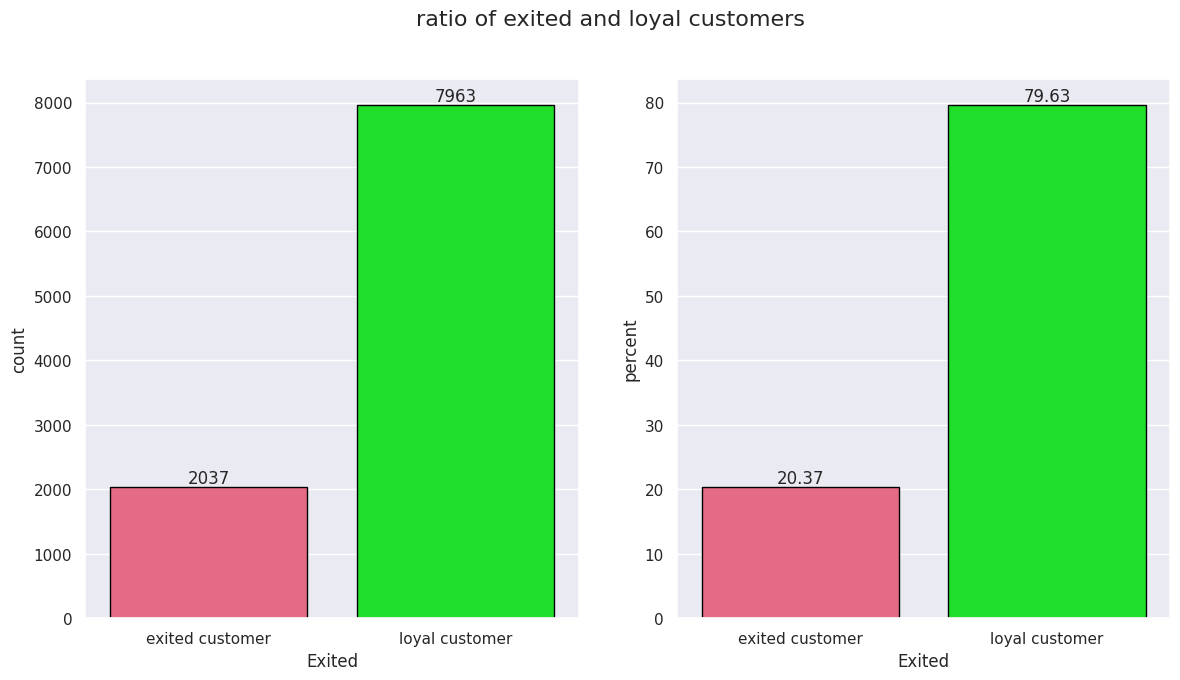

In [6]:
# Посмотрим на диаграме абсолютные значения, а также в процентах ушедих и лояльных клиентов

# Добавляем координатную сетку для всех графиков
sns.set_theme(style="darkgrid")

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 7))

sns.countplot(data = churn_data,
              x    = 'Exited',
              hue  = 'Exited',
              stat = 'count',
              ax   = axes[0],
              edgecolor = "black",
              palette = customer_palette
              )
              
 
sns.countplot(data = churn_data,
              x    = 'Exited',
              hue  = 'Exited',
              stat = 'percent',
              ax   = axes[1],
              edgecolor = "black",
              palette = customer_palette
              )

# Добавим общий заголовок для двух графиков
fig.suptitle('ratio of exited and loyal customers', fontsize=16)

# Добавим отметки на диаграммах
for i in range(2):
    for j in axes[i].containers:
        axes[i].bar_label(j)
    


Из представленных диаграм следует:
 - 20.4% клиентов отказались от услуг банка.
 - В абсолютном значении эквивалентно оттоку более 2000 человек.

### 9.6. Посмотрим кто чаще уходит, мужчины или женщины? 


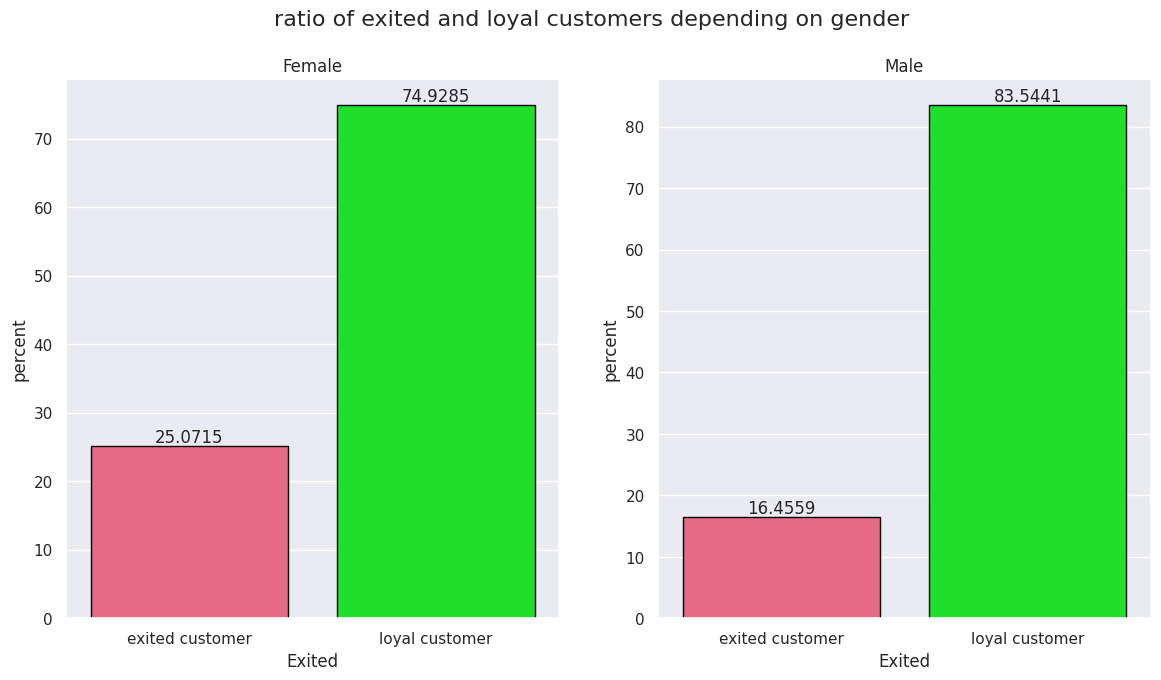

In [7]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 7))

# Посмотрим соотношение для каждой группы (мужчины и женщины) по отдельности

sns.countplot(data = churn_data[churn_data['Gender'] == 'Female'],
              x    = 'Exited',
              hue  = 'Exited',
              stat = 'percent',
              ax   = axes[0],
              edgecolor = "black",
              palette = customer_palette,
              
              )

sns.countplot(data = churn_data[churn_data['Gender'] == 'Male'],
              x    = 'Exited',
              hue  = 'Exited',
              stat = 'percent',
              ax   = axes[1],
              edgecolor = "black",
              palette = customer_palette
              )

axes[0].set_title('Female')
axes[1].set_title('Male')


# Добавим общий заголовок для двух графиков
fig.suptitle('ratio of exited and loyal customers depending on gender', fontsize=16)

# Добавим отметки на диаграммах
for i in range(2):
    for j in axes[i].containers:
        axes[i].bar_label(j,)

 - Среди женщин процент ушедших клиентов больше - 25%
 - Мужчин уходит всего 16.5 %

### 9.2 - 9.3 Теперь оценим распределение баланса пользователей, у которых на счету больше 2 500 долларов в целом, а также в разрезе признака оттока

Text(0.5, 0.98, 'user balance distribution')

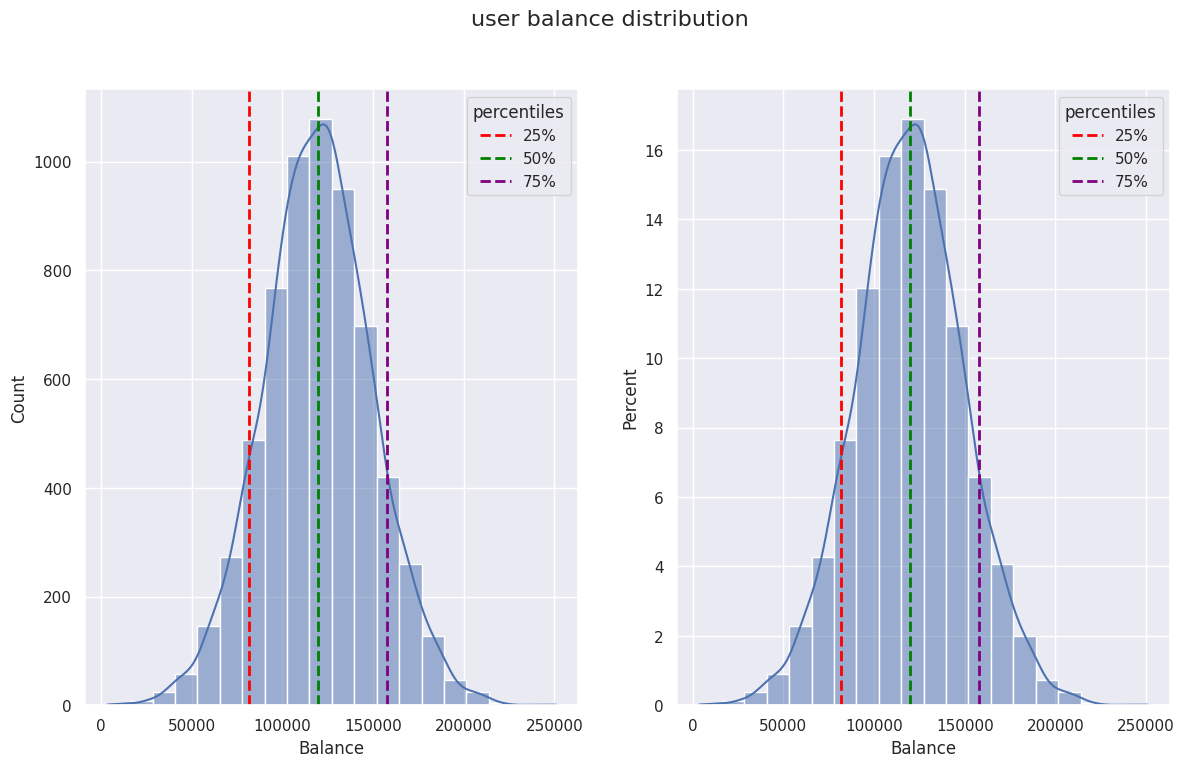

In [8]:

# Чтобы выделить пользователей с балансом более 2500 долларов создадим переменную mask
balance_mask = churn_data['Balance'] > 2500

fig, axes = plt.subplots(nrows = 1,
                       ncols = 2,
                       figsize=(14, 8)
                       )

sns.histplot(data = churn_data[balance_mask], 
             x    = 'Balance', 
             bins = 20,
             kde  = True,
             stat = 'count',
             ax   = axes[0]
             )

sns.histplot(data = churn_data[balance_mask], 
             x    = 'Balance', 
             bins = 20,
             kde  = True,
             stat = 'percent',
             ax = axes[1]
             )

# Для наглядности добавим на гистограмму персентили
percentiles = churn_data[balance_mask]['Balance'].quantile([0.1, 0.5, 0.9]).values
colors = ["red", "green", "purple"]
labels = ["25%", "50%", "75%"]

for p, color, label in zip(percentiles, colors, labels):
    # Добавление вертикальные линии
    axes[0].axvline(p, color=color, linestyle="--", linewidth=2, label=label)
    axes[1].axvline(p, color=color, linestyle="--", linewidth=2, label=label)
    
# Настройка легенды и подписей
axes[0].legend(title="percentiles")
axes[1].legend(title="percentiles")

fig.suptitle('user balance distribution', fontsize=16)



In [9]:
churn_data[balance_mask]['Balance'].describe()[3:]

min      3768.690
25%    100181.975
50%    119839.690
75%    139512.290
max    250898.090
Name: Balance, dtype: float64

 - Распределение зарплат клиентов в целом (включая лояльных и ушедших клиентов) с балансом более 2500$ имеет форму нормального.
 - Медиана 119840$

([], [])


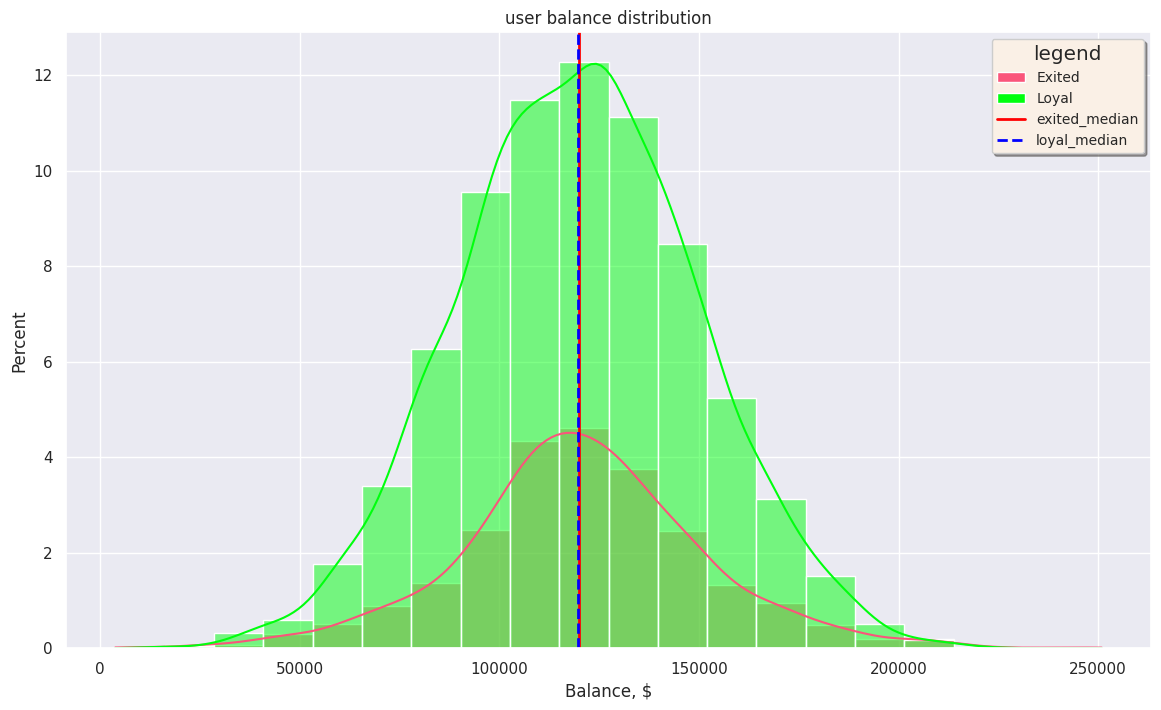

In [ ]:
# В зависимости, ушел или нет клиент

fig, ax = plt.subplots(figsize=(14, 8))
sns.histplot(data = churn_data[balance_mask], 
             x    = 'Balance', 
             bins = 20, 
             kde  = True, ax = ax, 
             hue  = 'Exited',
             stat = 'percent',
             palette = customer_palette,
             legend = True
             )

ax.set_title('user balance distribution')
ax.set_xlabel('Balance, $')

print(ax.get_legend_handles_labels())

# Добавляем медианы ушедших и лояльных
exited_median = churn_data[balance_mask & (churn_data['Exited'] == 'exited customer')]['Balance'].median()
loyal_median  = churn_data[balance_mask & (churn_data['Exited'] != 'exited customer')]['Balance'].median()

exited_median_line = ax.axvline(exited_median, color = 'red',   linestyle="-", linewidth=2, label = 'exited_median')
loyal_median_line  = ax.axvline(loyal_median,  color = 'blue', linestyle="--", linewidth=2, label = 'loyal_median')

# Создаем кастомные элементы легенды
legent_elements = [
    Patch(facecolor = customer_palette['exited customer'], label = 'Exited'),
    Patch(facecolor = customer_palette['loyal customer'], label = 'Loyal'),
    Line2D([0], [0], color = 'red',   linestyle="-", linewidth=2, label = 'exited_median'),
    Line2D([0], [0], color = 'blue', linestyle="--", linewidth=2, label = 'loyal_median')
]

ax.legend(
    handles = legent_elements,
    title = 'legend',
    title_fontsize = 'large',
    fontsize=10,
    frameon=True,
    fancybox=True,
    shadow=True,
    facecolor='linen'
)



 - Распределение зарплат клиентов с балансом более 2500$  в разрезе признака оттока также близко к нормальному.
 - Очеведно распределение баланса клиентов не оказывает влияния на их отток, медианы совпадают

### 9.4 Посмотрите на распределение возраста в разрезе признака оттока

exited_median_Age: 45.0
loyal_median_Age:  36.0


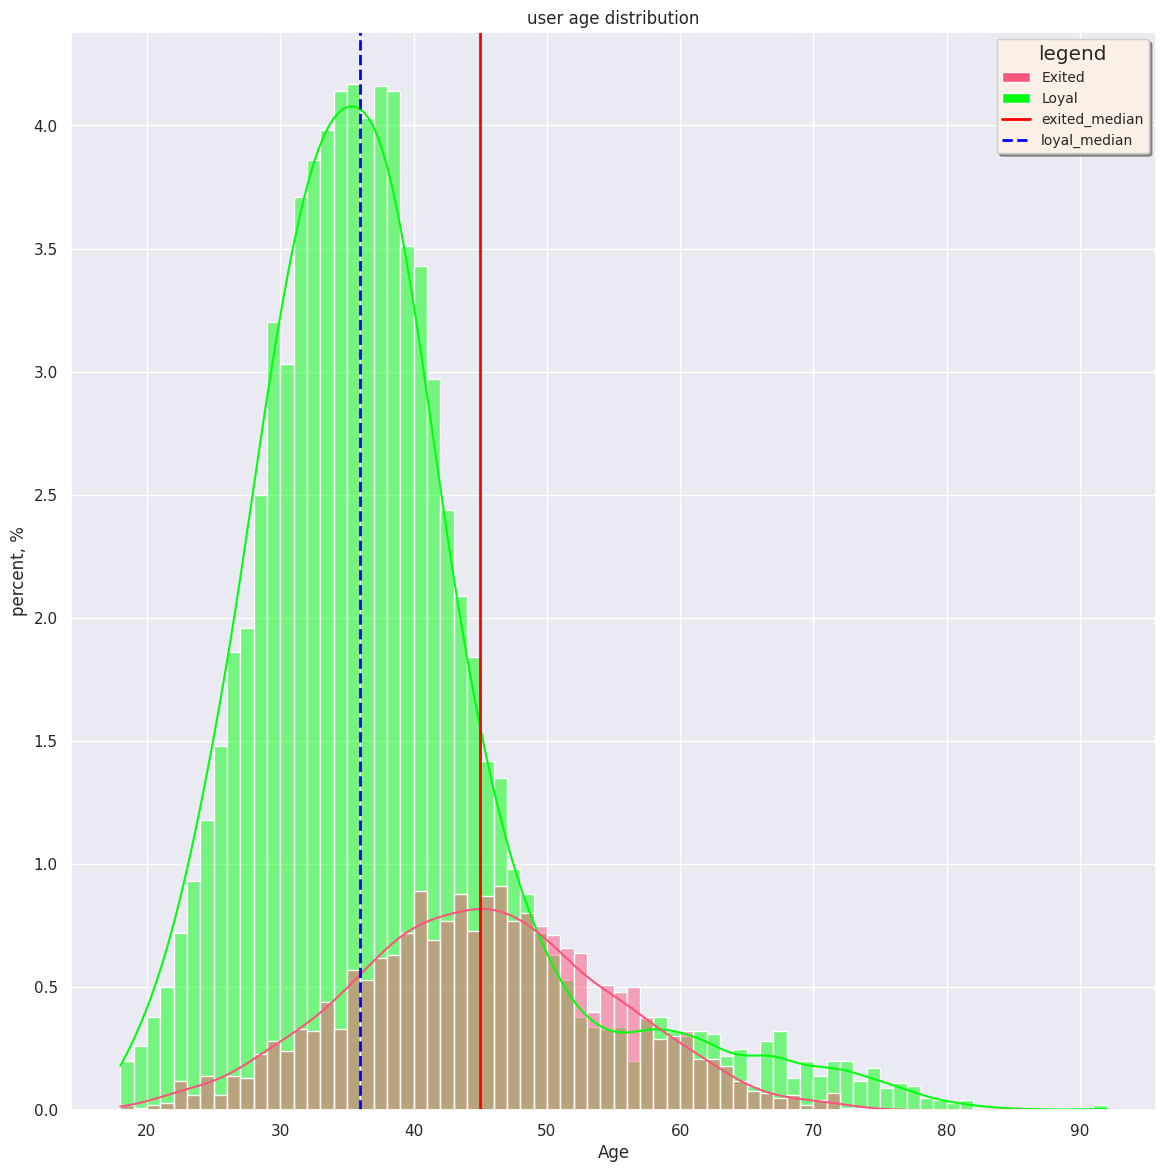

In [ ]:

fig, ax = plt.subplots(figsize=(14, 14))
sns.histplot(data = churn_data, 
             x    = 'Age', 
             kde  = True, 
             ax   = ax, 
             hue  = 'Exited', 
             stat = 'percent',
             binwidth = 1, 
             palette  = customer_palette)

ax.set_title('user age distribution')
ax.set_xlabel('Age')
ax.set_ylabel('percent, %')

# Добавим медианы на график
exited_median_Age = churn_data[churn_data['Exited'] == 'exited customer']['Age'].median()
loyal_median_Age  = churn_data[churn_data['Exited'] != 'exited customer']['Age'].median()
ax.axvline(exited_median_Age, color = 'red',   linestyle="-", linewidth=2, label=exited_median)
ax.axvline(loyal_median_Age,  color = 'blue', linestyle="--", linewidth=2, label=exited_median)

# Создаем кастомные элементы легенды
legent_elements = [
    Patch(facecolor = customer_palette['exited customer'], label = 'Exited'),
    Patch(facecolor = customer_palette['loyal customer'],  label = 'Loyal'),
    Line2D([0], [0], color = 'red',   linestyle="-", linewidth=2, label = 'exited_median'),
    Line2D([0], [0], color = 'blue', linestyle="--", linewidth=2, label = 'loyal_median')
]

ax.legend(
    handles = legent_elements,
    title = 'legend',
    title_fontsize = 'large',
    fontsize=10,
    frameon=True,
    fancybox=True,
    shadow=True,
    facecolor='linen'
)

print(f'exited_median_Age: {exited_median_Age}')
print(f'loyal_median_Age:  {loyal_median_Age}')

 - Распределение ушедших клиентов близко к нормальному.
 - Распредиление лояльных клиентов отличается от нормального наличием второго пика в возрасте 60 лет
 - Относительно распределения лояльных клиентов максимум распределения ушедших клиентов смещен в право.
 - Среди клиентов в возрасте от 48 до 58 лет доля ушедших больше доли лояльных.
 - После 70 лет резко падает количество ушедших клиентов.

 Вывод: клиенты от 48 до 58 лет уходят чаще всего.

### 9.5 Зависимость кредитного рейтинга клиента и его предполагаемой зарплаты

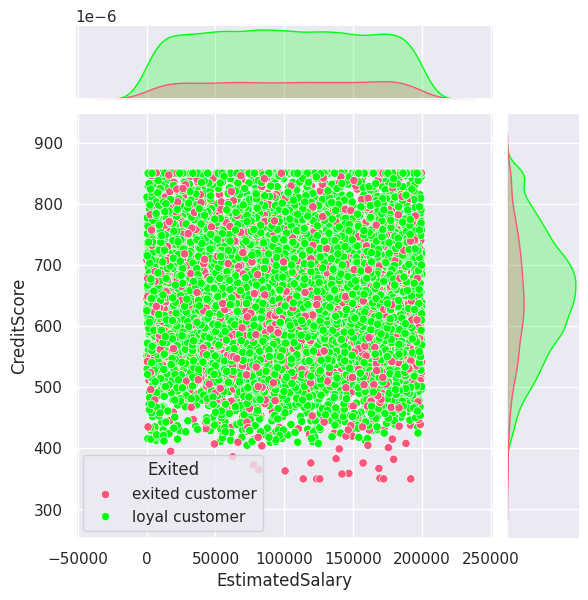

In [12]:
sns.jointplot(x = "EstimatedSalary", 
              y = "CreditScore", 
              data = churn_data, 
              kind = 'scatter', 
              hue  = 'Exited',
              palette = customer_palette
              )



 - Предполагаемая зарплата распределена равномерно для каждой группы.
 - Кредитный рейтинг имеет распределение близкое к нормальному, однако среди ушедших клиентов есть небольшой сдвиг максимума в сторону низкого рейтинга.
 - Среди клиентов с рейтингом меньшим либо равным 400 доля ушедших резко возрастает


### 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг?

In [13]:
# Для решения данной задачи сделаем сводную таблицу

pivot_DF = churn_data.pivot_table(index   = 'NumOfProducts',
                               columns = 'Exited',
                               values  = 'CustomerId',
                               aggfunc = 'count'
                               )
pivot_DF


Exited,exited customer,loyal customer
NumOfProducts,,
1,1409.0,3675.0
2,348.0,4242.0
3,220.0,46.0
4,60.0,NaN


In [15]:
# Заменим NaN нулем с помощью функции fillna()

pivot_DF.fillna(0, inplace = True)

# Добавим новые признаки: 
#    overall percent  - процент от общего количества клиентов
#    relative percent - процент относительно количества клиентов в каждой группе

pivot_DF['exited overall percent'] = 100 * pivot_DF['exited customer'] / churn_data['HasCrCard'].count()
pivot_DF['loyal overall percent']  = 100 * pivot_DF['loyal customer']  / churn_data['HasCrCard'].count()

pivot_DF['exited relative percent'] = 100 * pivot_DF['exited customer'] / (pivot_DF['exited customer'] + pivot_DF['loyal customer'])
pivot_DF['loyal relative percent']  = 100 * pivot_DF['loyal customer']  / (pivot_DF['exited customer'] + pivot_DF['loyal customer'])
pivot_DF.index = pivot_DF.index.astype(str)
pivot_DF
    

Exited,exited customer,loyal customer,exited overall percent,loyal overall percent,exited relative percent,loyal relative percent
NumOfProducts,,,,,,
1,1409.0,3675.0,14.09,36.75,27.714398,72.285602
2,348.0,4242.0,3.48,42.42,7.581699,92.418301
3,220.0,46.0,2.20,0.46,82.706767,17.293233
4,60.0,0.0,0.60,0.00,100.000000,0.000000


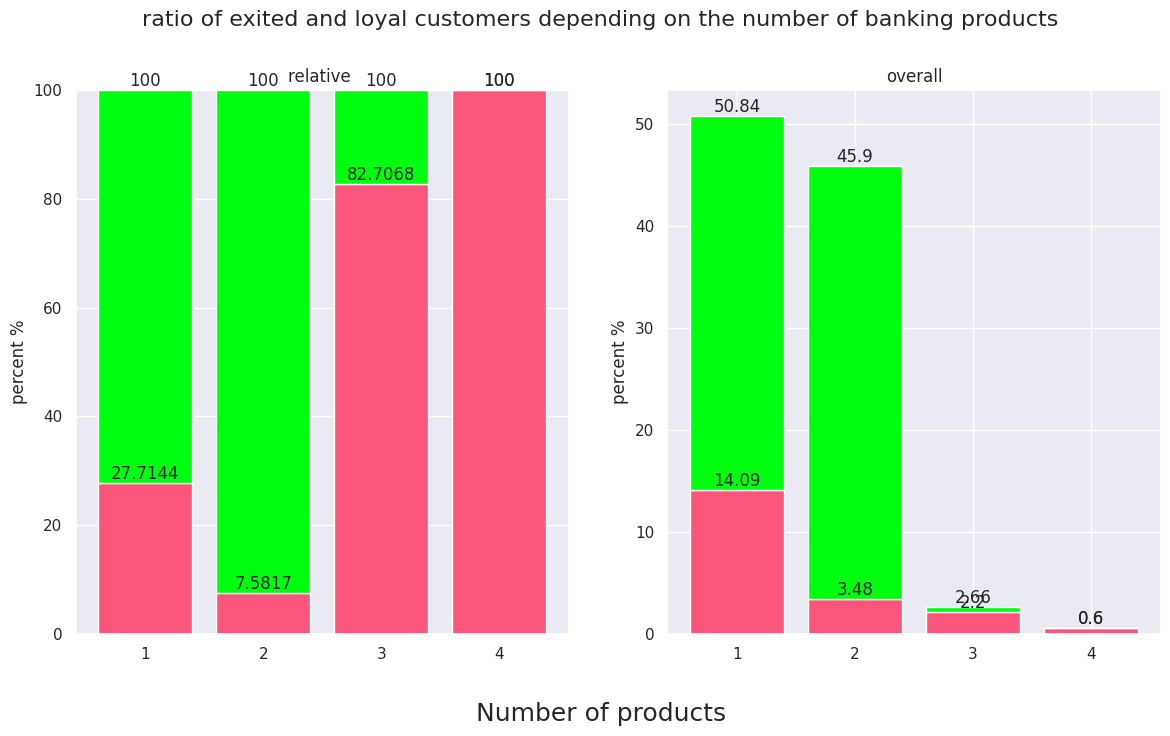

In [16]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 8))

axes[0].bar(x = pivot_DF.index.values,
       height = pivot_DF['exited relative percent'],
       color = customer_palette['exited customer'])

axes[0].bar(x = pivot_DF.index.values,
       height = pivot_DF['loyal relative percent'],
       bottom = pivot_DF['exited relative percent'],
       color = customer_palette['loyal customer'])

axes[1].bar(x = pivot_DF.index.values,
       height = pivot_DF['exited overall percent'],
       color = customer_palette['exited customer'])

axes[1].bar(x = pivot_DF.index.values,
       height = pivot_DF['loyal overall percent'],
       bottom = pivot_DF['exited overall percent'],
       color = customer_palette['loyal customer'])

axes[0].set_title('relative ')
axes[0].set_ylabel('percent %' )

axes[1].set_title('overall')
axes[1].set_ylabel('percent %')

# Добавим общий заголовок для двух графиков
fig.suptitle('ratio of exited and loyal customers depending on the number of banking products', fontsize=16)

# Добавляем общую для двух графиков подпись по оси х
fig.subplots_adjust(bottom = 0.2)
fig.text(0.5, 0.1, "Number of products",
         ha = 'center',
         va = 'center',
         fontsize = 18)

# Добавим отметки на диаграммах
for i in range(2):
    for j in axes[i].containers:
        axes[i].bar_label(j)

 - Все клиенты с четырьмя продуктами банка покинули этот банк
 - Наибольшее количество лояльных клиентов в группе с двумя банковскими продуктами
 Вывод: стоит отдать предпочтение клиентам с 1 и двумя продуктами от банка

### 9.8. Как влияет наличие статуса активного клиента на отток клиентов?

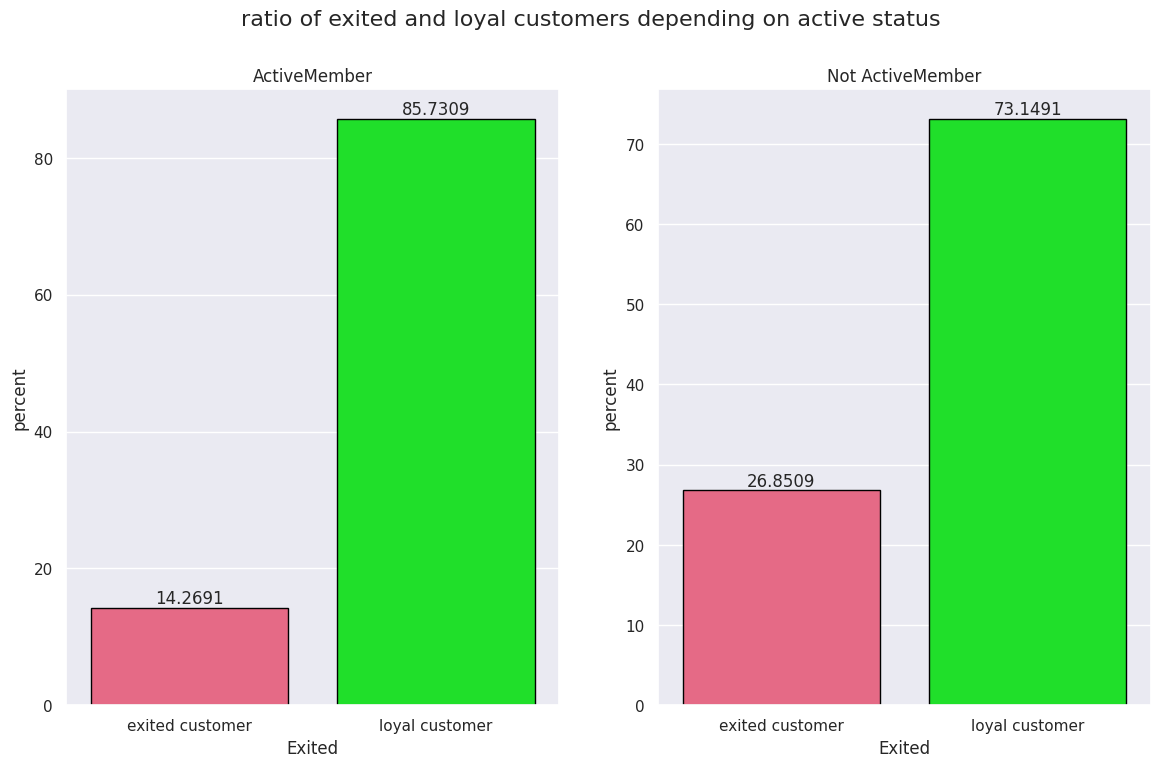

In [17]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 8))

# Посмотрим соотношение для каждой группы по отдельности

sns.countplot(data = churn_data[churn_data['IsActiveMember'] == 1],
              x    = 'Exited',
              hue  = 'Exited',
              stat = 'percent',
              ax   = axes[0],
              edgecolor = "black",
              palette = customer_palette,
              
              )

sns.countplot(data = churn_data[churn_data['IsActiveMember'] == 0],
              x    = 'Exited',
              hue  = 'Exited',
              stat = 'percent',
              ax   = axes[1],
              edgecolor = "black",
              palette = customer_palette
              )

axes[0].set_title('ActiveMember')
axes[1].set_title('Not ActiveMember')


# Добавим общий заголовок для двух графиков
fig.suptitle('ratio of exited and loyal customers depending on active status', fontsize=16)

# Добавим отметки на диаграммах
for i in range(2):
    for j in axes[i].containers:
        axes[i].bar_label(j,)
        


- Процент оттока активных клиентов составил 14.3%, в то время как среди неактивных клиентов процент оттоке 26.8 %

### 9.9. В какой стране доля ушедших клиентов больше?

In [ ]:
# Делаем сводную таблицу по странам, добавляем процент оттока по каждой стране

geography = churn_data.pivot_table(index = 'Geography', columns = 'Exited', values = 'CustomerId', aggfunc = 'count', )
geography['relative percent'] = 100 * geography['exited customer'] / (geography['exited customer'] + geography['loyal customer'])
geography.reset_index(inplace = True)
geography

Exited,Geography,exited customer,loyal customer,relative percent
0,France,810,4204,16.154767
1,Germany,814,1695,32.443204
2,Spain,413,2064,16.673395


In [ ]:
import plotly
import plotly.express as px

#строим график
fig = px.choropleth(
    data_frame   = geography,  #DataFrame
    locations    = 'Geography', #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color        = "relative percent", #от чего зависит цвет
    color_continuous_scale="Reds",
    range_color=[15, 34], #диапазон цвета
    title  = 'Which country has a higher proportion of exited customers? ', #заголовок
    width  = 800, #ширина
    height = 600, #высота
    scope = 'europe'
)

#отображаем график
fig.show()

 - Больше всего, 32.4 % нелояльных клиентов живет в германии
 - Во Франции и Испании процент ушедших клиентов совпадает и равен 16%

### Связь оттока клиентов с рейтингом и продолжительностью обслуживания в банке

In [20]:

# Переводим числовой признак CreditScore в категориальный

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
# Сделаем новый признак, CreditScoreCat
churn_data['CreditScore_cat'] = churn_data.CreditScore.apply(get_credit_score_cat)
churn_data['Exited Mask'] = churn_data['Exited'].apply(lambda x: 1 if x == 'exited customer' else 0)
churn_data.head(5)



,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScore_cat,Exited Mask
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,exited customer,Fair,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,loyal customer,Fair,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,exited customer,Poor,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,loyal customer,Good,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,loyal customer,Excellent,0


In [21]:
score_pivot = churn_data.pivot_table(index   = 'CreditScore_cat',
                                     columns = 'Tenure',
                                     values  = 'Exited Mask',
                                     aggfunc = 'mean')
score_pivot

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScore_cat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


Text(0.5, 1.0, 'Correlation of customer churn with rating and duration of service with the bank')

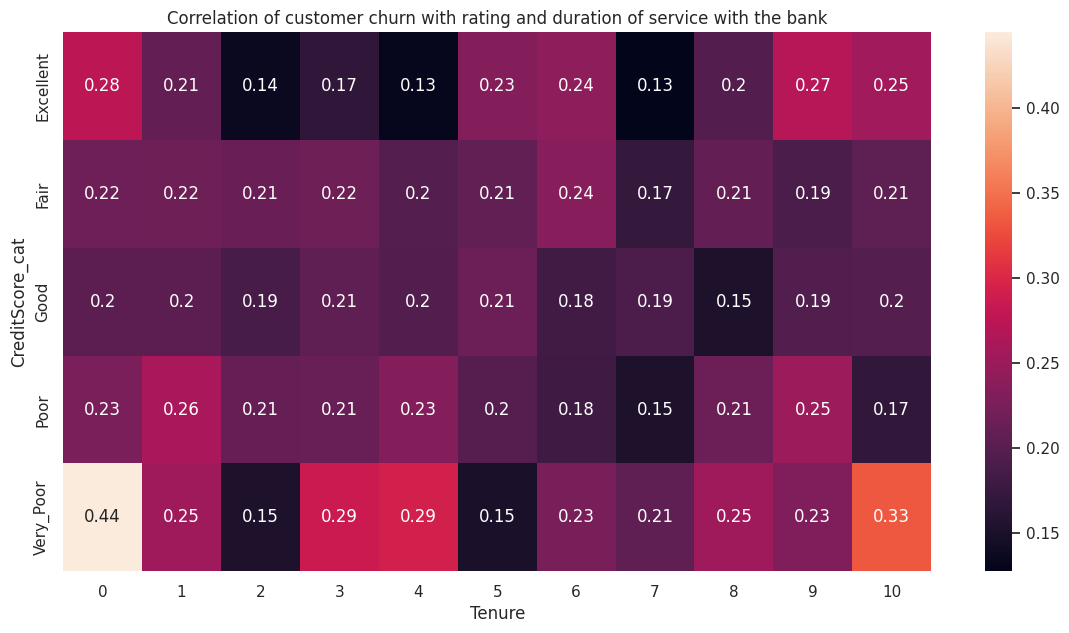

In [27]:

fig, ax = plt.subplots(figsize = (14, 7))

sns.heatmap(data = score_pivot,
            annot=True,
            ax = ax)

ax.set_title('Correlation of customer churn with rating and duration of service with the bank')

 - Чаще всего уходят клиенты с плохим рейтингом, особенно в первый год